# Statistics

- __Descriptive statistics__
- __Random numbers__
- __Random variables & distributions__
- __Hypothesis testing__
- __Nonparametric methods__

## Imports

In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import random
import seaborn as sns

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
sns.set(style="whitegrid")

### Descriptive statistics

* statistics are necessary when we have __incomplete information__.
* __populations__ denoted by capital letters (X)
* __sample groups__ denote by lowercase letters (x)
* __population variance__: 1/N * sum(xi - u)^2 (mean of squared distance from the mean)
* __sample variance__: 1/(n-1) * sum(xi - ux)^2 (n-1 because one degree of freedom eliminated)


In [4]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])

In [5]:
np.mean(x), np.median(x), x.min(), x.max()

(3.1, 3.0, 0.9, 6.7)

In [6]:
x.var(), x.std()

(3.0700000000000007, 1.7521415467935233)

In [7]:
# ddof = delta degrees of freedom
x.var(ddof=1), x.std(ddof=1)

(3.5085714285714293, 1.8731181032095732)

### Random numbers
* __np.random.rand()__ returns uniform distribution [0,1]
* __np.random.randn()__ returns std normal distribution (mean 0, std deviation 1)
* __np.random.randint()__ returns uniform distribution (low, high)

In [13]:
random.seed(123456789)
random.random()

0.6414006161858726

In [14]:
# uniform across range
random.randint(0, 10)

8

In [15]:
np.random.seed(123456789)
np.random.rand()

0.532833024789759

In [16]:
# normal distribution
np.random.randn()

0.8768342101492541

In [17]:
np.random.rand(5)

array([0.71356403, 0.25699895, 0.75269361, 0.88387918, 0.15489908])

In [18]:
np.random.randn(2, 4)

array([[ 3.13325952,  1.15727052,  1.37591514,  0.94302846],
       [ 0.8478706 ,  0.52969142, -0.56940469,  0.83180456]])

In [19]:
np.random.randint(10, size=10)

array([0, 3, 8, 3, 9, 0, 6, 9, 2, 7])

In [20]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[12, 18, 18, 17, 14, 12, 14, 10, 16, 19],
       [15, 13, 15, 18, 11, 17, 17, 10, 13, 17]])

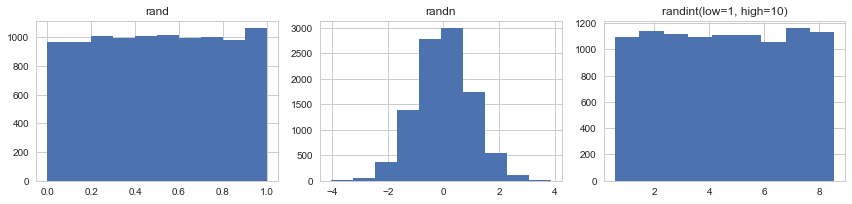

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

fig.tight_layout()
#fig.savefig("ch13-random-hist.pdf")

In [22]:
# generate unique list of integers w/o replacement
np.random.choice(10, 5, replace=False)

array([9, 0, 5, 8, 1])

In [24]:
# seed sets to generator to known state - so it can generate same sequence
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [25]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [23]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [26]:
# you can create multiple initial states for a generator
prng = np.random.RandomState(123456789)

#### rand, chi-squared, student's-T, F, discrete binomial, poisson support

In [27]:
prng.rand(2, 4)

array([[0.53283302, 0.5341366 , 0.50955304, 0.71356403],
       [0.25699895, 0.75269361, 0.88387918, 0.15489908]])

In [28]:
prng.chisquare(1, size=(2, 2))

array([[1.00418922e+00, 1.26859720e+00],
       [2.02731988e+00, 2.52605129e-05]])

In [29]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [30]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [31]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [32]:
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

### Random variables & distributions
![pic](pics/random-var-funcs.png)

In [33]:
# example: normal distribution
np.random.seed(123456789)
X = stats.norm(1, 0.5)

In [34]:
X.mean(), X.median(), X.std(), X.var()

(1.0, 1.0, 0.5, 0.25)

In [35]:
# noncentral moments of arbitrary order
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [36]:
# distribution-dependent list of stats (in this case, normal --> mean, variance)
X.stats()

(array(1.), array(0.25))

In [37]:
# prob distribution
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [38]:
# cume distribution
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [39]:
# upper & lower interval limits for a given confidence%
X.interval(0.95), X.interval(0.99)

((0.020018007729972975, 1.979981992270027),
 (-0.2879146517744502, 2.28791465177445))

In [40]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
    
    return axes

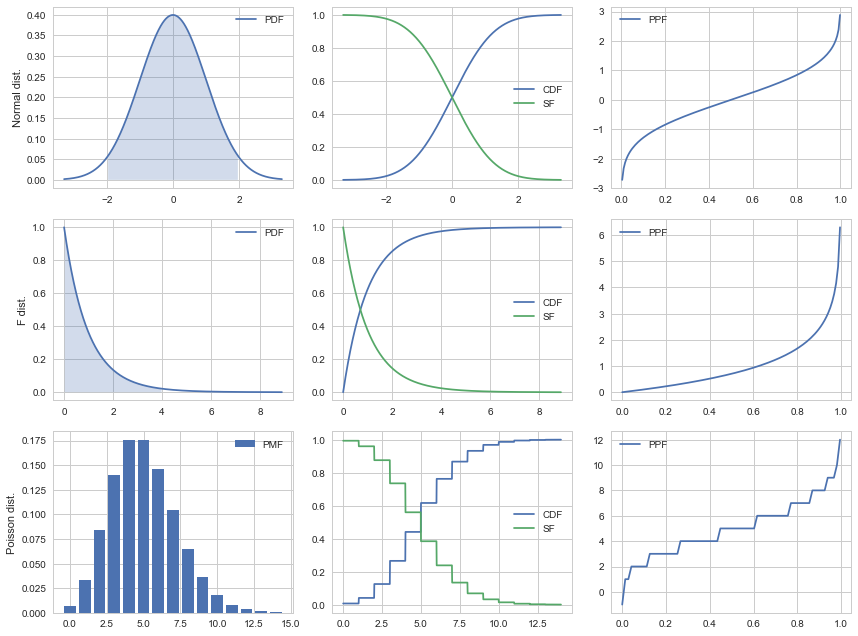

In [41]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

fig.tight_layout()
#fig.savefig("ch13-distributions.pdf")

In [42]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", normed=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


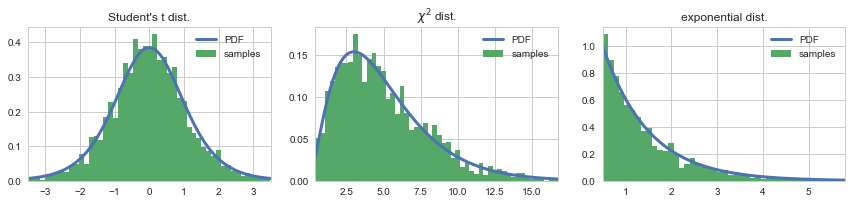

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(2000), "Student's t dist.", ax=axes[0])
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(2000), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(2000), "exponential dist.", ax=axes[2])
fig.tight_layout()
fig.savefig("ch13-dist-sample.pdf")

In [44]:
# another use case:
# fit known distribution with unknown params to given dataset using fit()
# known as a "max likelihood fit"

X = stats.chi2(df=5)
X_samples = X.rvs(500) # 500 datapoints, chi-square distribution, degrees freedom=5

In [45]:
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale

(4.754454016475741, 0.029664652062034717, 1.0645584778603987)

In [46]:
# pass to initializer
Y = stats.chi2(df=df, loc=loc, scale=scale)

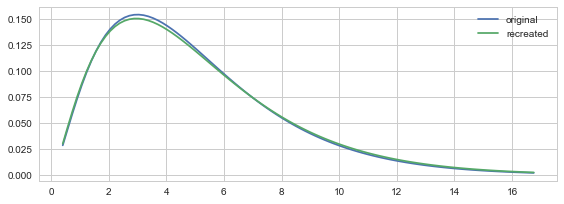

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

ax.plot(x, X.pdf(x), label="original")
ax.plot(x, Y.pdf(x), label="recreated")
ax.legend()

fig.tight_layout()
#fig.savefig("ch13-max-likelihood-fit.pdf")

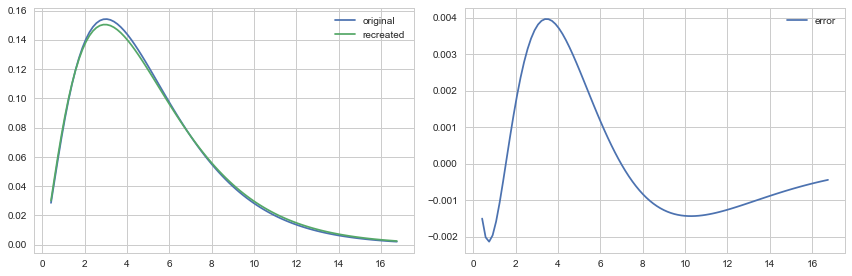

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

fig.tight_layout()
#fig.savefig("ch13-max-likelihood-fit.pdf")

### Hypothesis testing
* Statistical hypothesis testing: a methodology for evaluating if a claim (hypothesis) is reasonable on the basis of data.
* __null hypothesis (H0)__: currently accepted state of knowledge
* __alternative hypothesis (Ha)__: challenges current state
![pic](pics/hypothesis-test-cases.png)

In [49]:
# example:
# null hypo = mean of population (u) is u0 = 1.0
np.random.seed(123456789)
mu, sigma = 1.0, 0.5
X = stats.norm(mu-0.2, sigma)

In [50]:
n = 100
X_samples = X.rvs(n)

In [51]:
# test statistic: z = (xbar-uo)/(sigma/sqrt(n))
z = (X_samples.mean() - mu)/(sigma/np.sqrt(n))
z

-2.8338979550098298

In [52]:
# if population variance not known, can use sample stdev instead
t = (X_samples.mean() - mu)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-2.9680338545657845

In [53]:
# two-sided hypo test of signficance level 5% (2.5% per side) -- threshold is:
stats.norm().ppf(0.025)

-1.9599639845400545

* The observed statistic ~2.83 which is smaller than threshold value of -1.96.
* we have sufficient grounds to reject the null hypothesis.

In [54]:
# find pval for observed test stats using cdf(), *2 for two-sided loss
2 * stats.norm().cdf(-abs(z))

0.004598401329075357

In [55]:
# if using t-distribution
2 * stats.t(df=(n-1)).cdf(-abs(t))

0.003758647967422721

In [56]:
t,p = stats.ttest_1samp(X_samples, mu)
t,p

(-2.968033854565784, 0.003758647967422721)

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


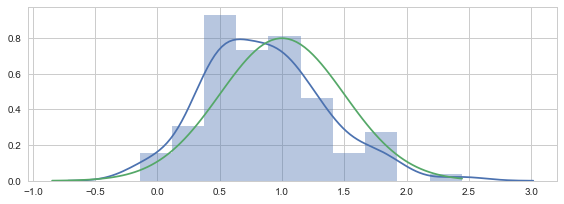

In [57]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

fig.tight_layout()
fig.savefig("ch13-hypothesis-test-dist-sample-mean.pdf")

# light green = null hypothesis
# dark blue = sample estimated distribution function

* Two-variable problems

In [59]:
# null hypo: population means of two random vars are equal
# create two random variables with normal distributions & randomly chosen pop. means
# 50 samples each
n = 50
mu1, mu2 = np.random.rand(2)

X1        = stats.norm(mu1, sigma)
X2        = stats.norm(mu2, sigma)
X1_sample = X1.rvs(n)
X2_sample = X2.rvs(n)

In [60]:
# determine if samples provide enough evidence to prove mean1 <> mean2 (reject null hypo)
t,p = stats.ttest_ind(X1_sample, X2_sample)
t,p

(-7.377716281070069, 5.2584768094658427e-11)

In [61]:
# two population means are indeed different
mu1, mu2

(0.03665665074761826, 0.7239826972716432)

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


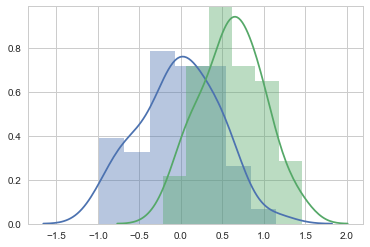

In [62]:
sns.distplot(X1_sample)
sns.distplot(X2_sample)

### Nonparameteric methods
* __parametric distributions__: can be described a few params (ex: mean, variance). Given sampled data, we can fit a distribution function to the data.

* __Kernel density estimation (KDE)__: an alternative way to build a model of an unknown distribution function. Can be thought of as a smoothed version of a histogram.

* key parameters: __bandwidth__ (defines scale for influence of each term in sum. too big = featureless estimate; too small = too noisy) and __K__ (a normalized kernel function).
* Multiple choices available for kernel functions - Gaussian (normal) == popular one.

In [63]:
# samples drawn from "unknown" distribution 
# (here drawn from chi-square, 5 degrees of freedom)
np.random.seed(0)
X = stats.chi2(df=5)
X_samples = X.rvs(100)
X_samples[0:10]

array([11.87740141,  5.62133928, 12.48424465,  2.04604944,  4.03651267,
        5.65798023,  6.98206807,  4.70149541,  5.77577501,  5.39173922])

In [64]:
# define KDE based on gaussian kernel
kde = stats.kde.gaussian_kde(X_samples)

In [65]:
# initial bandwidth setting
kde_low_bw = stats.kde.gaussian_kde(
    X_samples, 
    bw_method=0.25)
kde_low_bw

In [66]:
x = np.linspace(0, 20, 100)

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


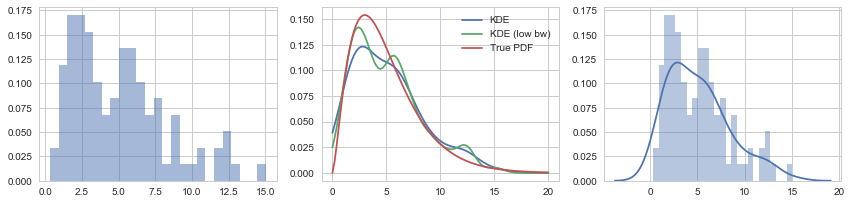

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, normed=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

fig.tight_layout()
#fig.savefig("ch13-hist-kde.pdf")

In [68]:
# given a KDE, use it to generate new random numbers
kde.resample(10)

array([[1.75376869, 0.5812183 , 8.19080268, 1.38539326, 7.56980335,
        1.16144715, 3.07747215, 5.69498716, 1.25685068, 9.55169736]])

In [70]:
# indirect method for finding cume distr functions (CDF) or percent-point functs (PPT)
# in this case (1-dimensional KDE), obtain corresponding CDF using integrate_box_1d

def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)

kde_cdf = np.vectorize(_kde_cdf)

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


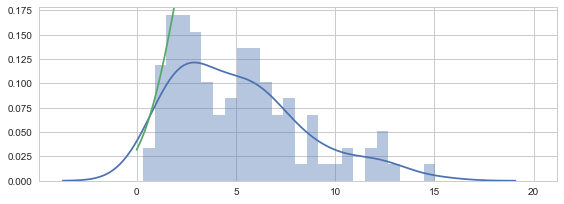

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

sns.distplot(X_samples, bins=25, ax=ax)
x = np.linspace(0, 20, 100)
ax.plot(x, kde_cdf(x))

fig.tight_layout()

In [72]:
# using fsolve to find the inverse (PPF)

def _kde_ppf(q):
    return optimize.fsolve(
        lambda x, q: kde_cdf(x) - q, 
        kde.dataset.mean(), 
        args=(q,))
[0]

kde_ppf = np.vectorize(_kde_ppf)

In [73]:
# 90% confidence interval
X.ppf([0.05, 0.95])

array([ 1.14547623, 11.07049769])